#EDA PRELIMINAR

## Se importan las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport

Agregamos algunas funciones para utilzarlas más adelante

In [ ]:
def Pareto(df, dato_analizar):
    """
    It is a function that returns a Pareto plot.

    Arguments:
    df (pandas dataframe) : Data frame to analyse
    data_analyse (str) : Column to analyse

    """

    counts = df[dato_analizar].value_counts()
    df_counts = pd.DataFrame({dato_analizar: counts.index, 'count': counts.values})                                 # Generamos un df con la cuenta de cada categoria a analizar
    df_counts['acumulado'] = df_counts['count'].cumsum() / df_counts['count'].sum() * 100
    df_counts = df_counts.sort_values(by='count', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 6))                                                                         # Crear la figura y los ejes

    sns.barplot(data=df_counts, x=dato_analizar, y='count', ax=ax, palette='coolwarm_r')                            # Graficamos el barplot de la categoria
    plt.xticks(rotation=90)
    plt.title(label='Pareto')
    plt.xlabel(dato_analizar)
    plt.ylabel('Qty')

    ax2 = ax.twinx()                                                                                                # Agregamos la gráfica de línea para el acumulado
    ax2.plot(df_counts[dato_analizar], df_counts['acumulado'], color='red', marker='o', linestyle='-', linewidth=2.5)
    ax2.set_ylabel('Cumulative percentage')

    plt.show()

In [ ]:
def PorcentajeNulos(df):
    """
    Devuelve un resumen del número de registros por columna en un marco de datos, y
    el porcentaje de valores nulos de cada una. También devuelve
    devuelve el tipo de datos de cada columna.

    Argumentos:
    df (pandas dataframe): Marco de datos a analizar

    """
    tipos = df.dtypes

    df_nulos = pd.DataFrame(tipos, columns=['Data_Types'])
    df_nulos['%_Null'] = round(df.isnull().sum() / len(df) * 100,2)
    df_nulos['Qty_Null'] = round(df.isnull().sum(),2)
    df_nulos['Qty_No_Null'] = round(df.count(),2)
    df_nulos['Total_Registros'] = len(df)

    return df_nulos

In [ ]:
from google.colab import auth
auth.authenticate_user()

# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Business filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df = client.query(sql_query).to_dataframe()


## Análisis preliminar Bussiness Dataset

### Se importan los datos de BigQuery

In [ ]:
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state_1,postal_code_1,latitude_1,longitude_1,stars_1,review_count_1,is_open_1,attributes_1,categories_1,hours_1
0,9htzdF5o5qf48vYWj1J2og,Mama Brava Pizza & Donair,"West Edmonton Mall, 8882 170 Street NW Suite 1582",Edmonton,PA,T5T,53.522440,-113.621871,1.0,7,...,None,None,None,None,None,None,None,None,None,None
1,r6oMjYjLGd6o-EctiaEJxg,Wendy's,4361 Us Rt 130 South,Burlington,AZ,08016,40.053351,-74.894158,1.0,23,...,None,None,None,None,None,None,None,None,None,None
2,pGGaMFN3_xWm7JlPXfVCaA,Checkers,2105 Burlington-Mt Holly Rd,Burlington,PA,08016,40.049443,-74.838578,1.0,23,...,None,None,None,None,None,None,None,None,None,None
3,NQASJJzArkdQaXCl6JKOpA,Chipotle Mexican Grill,789 Delsea Dr N,Glassboro,AZ,08028,39.721945,-75.116001,1.0,20,...,None,None,None,None,None,None,None,None,None,None
4,-7Rx5jVeQmlVoAU_oXrzew,McDonald's,24 W Marlton Pike,Cherry Hill,FL,08034,39.914764,-75.012779,1.0,11,...,None,None,None,None,None,None,None,None,None,None


### Valores nulos y tipos de datos

Revisamos el tipo de dato y la cantidad de nulos por columna

In [ ]:
PorcentajeNulos(df)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
business_id,object,0.00,0,31597,31597
name,object,0.00,0,31597,31597
address,object,0.87,276,31321,31597
city,object,0.00,0,31597,31597
state,object,0.00,0,31597,31597
postal_code,object,0.03,11,31586,31597
latitude,float64,0.00,0,31597,31597
longitude,float64,0.00,0,31597,31597
stars,float64,0.00,0,31597,31597
review_count,Int64,0.00,0,31597,31597


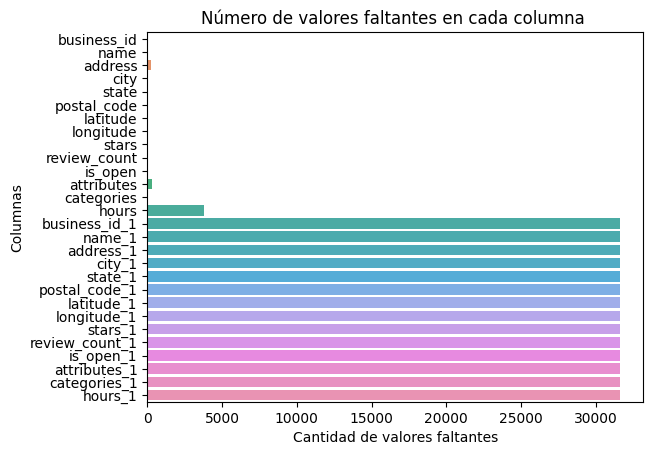

In [ ]:
nulos = df.isnull().sum()
sns.barplot( y = nulos.index, x = nulos.values, orient = 'h')
plt.title('Número de valores faltantes en cada columna ')
plt.ylabel('Columnas')
plt.xlabel('Cantidad de valores faltantes')
plt.show()


Podemos observar 14 columnas totalmente vacías, por lo que podemos precindir de ellas, así tmabién que la cantidad de nulos en las columnas de adress (0.87%) y atributes (0.97%) son despreciables por lo que se eliminarán con fines de facilitar el procesamiento en este notebook.

In [ ]:
# Eliminamos las columnas vacías
df_null = df.isnull().sum().reset_index(name='count')
df_null_total = df_null[(df_null['count'] == len(df))]
columns_null_total = df_null_total['index'].tolist()
df.drop(columns_null_total, axis=1, inplace=True)


# Eliminamos los registros con un % de valores nulos menores al 10%
df_null_min = df_null[(df_null['count'] /len(df)).between(0.000001, 0.1)]
columns_null_min = df_null_min['index'].tolist()
df = df.dropna(subset = columns_null_min)

Hay 31,597 negocios en la plataforma

In [ ]:
df['business_id'].nunique()

31597

### Valores duplicados

In [ ]:
duplicados = df[df.duplicated(keep=False)]
duplicados.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


No se observan valores duplicados en el Dataframe

### Outliers

Revisamos los outliers de las variables numéricas, en este caso siendo latitud y longitud

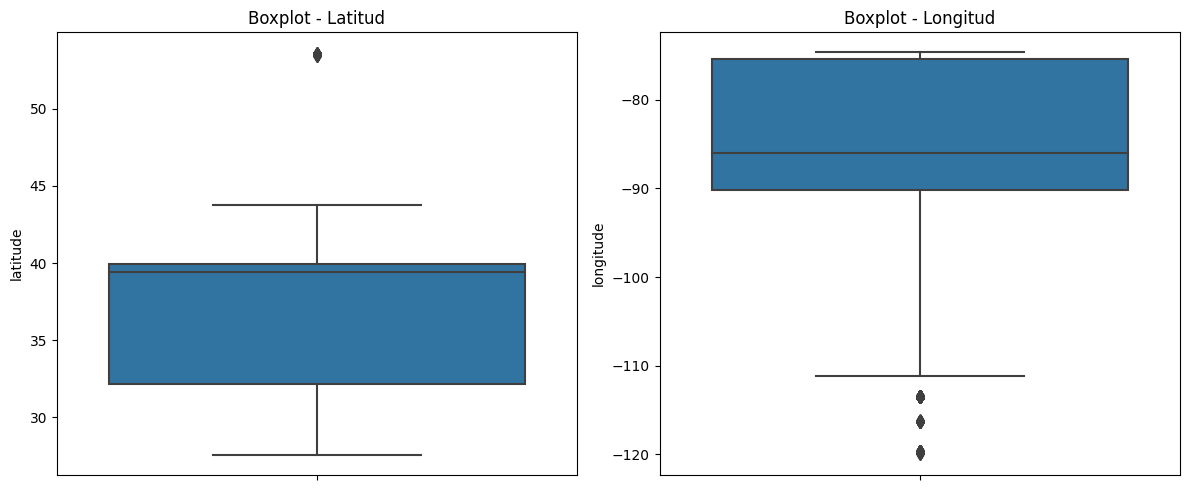

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='latitude', data=df, ax=axes[0])
axes[0].set_title('Boxplot - Latitud')
sns.boxplot(y='longitude', data=df, ax=axes[1])
axes[1].set_title('Boxplot - Longitud')

plt.tight_layout()
plt.show()


En los barplot se observan outliers, procederemos a evaluar si hay que eliminarlos o no

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar filas con outliers
outliers = df[(df['latitude'] < limite_inferior) | (df['latitude'] > limite_superior)]
outliers.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
136,1Q9cLfPP-PTgaWYo6_9S8Q,Tokyo Express,12930 82 St,Edmonton,IN,T5E 2T2,53.588138,-113.467880,1.0,6,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Japanese",None
137,Tlx0CVjND3ytUg-ti_Jakw,A&W,13440 97th Street,Edmonton,IN,T5E 4E1,53.595967,-113.492507,1.0,5,1,"{'RestaurantsReservations': 'False', 'HasTV': ...","Restaurants, Fast Food, Burgers","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
138,DSkpda2eBvPbTcwT3m4cUQ,KFC,8730 156th Street,Edmonton,LA,T5R 1Y5,53.521023,-113.590989,1.0,7,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Fast Food, Chicken Wings, American (Traditiona...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
139,7uS3AAV7Scm1Uuv2dfqc4Q,KFC,10021 178th Street,Edmonton,PA,T5S 1T2,53.539192,-113.626789,1.0,6,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Food, Chicken Shop, Chicken Wings...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
140,Tj9FmBCHd84kjAE9vcoBnw,KFC,2474 Guardian Road NW,Edmonton,IN,T5T 1K8,53.509187,-113.675652,1.0,5,1,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","American (Traditional), Fast Food, Restaurants...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."


Con geopandas, buscamos los outliers

<ipython-input-177-843589542acb>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


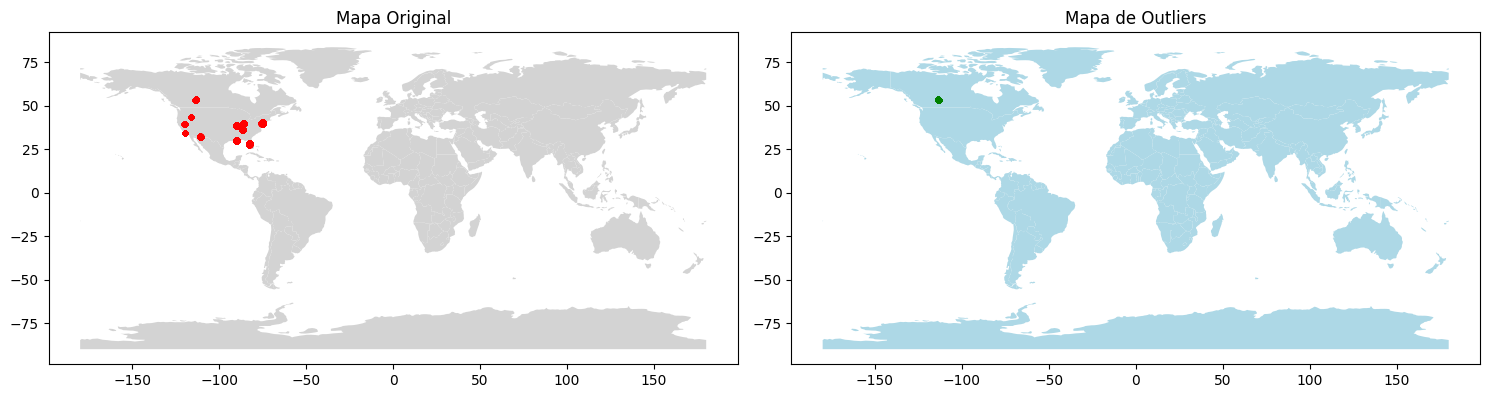

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Crear geometrías Point para el DataFrame original
geometry_df = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_df = gpd.GeoDataFrame(df, geometry=geometry_df)

# Crear geometrías Point para el DataFrame de outliers
geometry_outliers = [Point(xy) for xy in zip(outliers['longitude'], outliers['latitude'])]
gdf_outliers = gpd.GeoDataFrame(outliers, geometry=geometry_outliers)

# Crear mapas base mundiales
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Configurar el diseño de los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Subgráfico 1: Mapa para el DataFrame original
world.plot(ax=axs[0], color='lightgray')
gdf_df.plot(ax=axs[0], color='red', markersize=10)
axs[0].set_title('Mapa Original')

# Subgráfico 2: Mapa para el DataFrame de outliers
world.plot(ax=axs[1], color='lightblue')
gdf_outliers.plot(ax=axs[1], color='green', markersize=10)
axs[1].set_title('Mapa de Outliers')

# Configuraciones adicionales del diseño
#plt.suptitle('Comparación de Outliers', fontsize=16)
plt.tight_layout()
plt.show()


Se observa que los datos que se determinaron outliers están en Canadá, pero la dirección de esos establecimientos se encuentra en otros estados de USA, por lo que podemos asumir que los puntos de latitud y longitud no son outliers, sino que son incorrectos.

### Análisis de datos categóricos

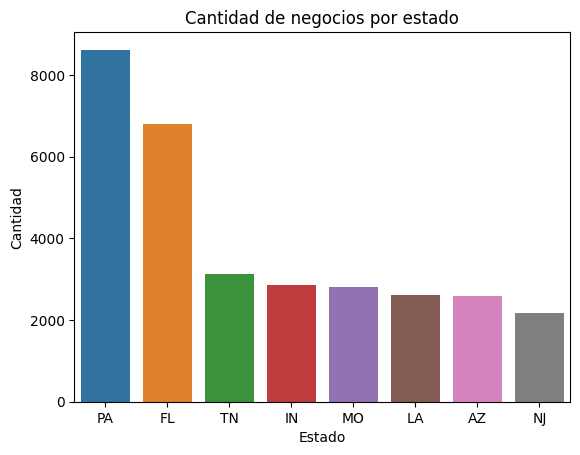

In [ ]:
count_by_state = df['state'].value_counts().reset_index(name='count')

orden = count_by_state.sort_values(by='count', ascending=False)['index']

sns.countplot(x='state', data=df, order=orden)
plt.title('Cantidad de negocios por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


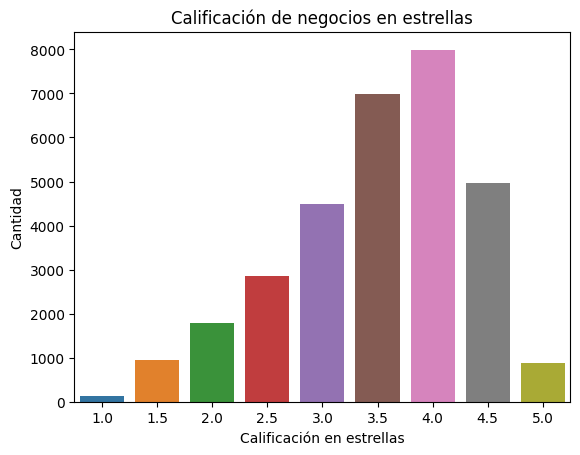

In [ ]:
sns.countplot(x = 'stars', data = df)
plt.xlabel('Calificación en estrellas')
plt.ylabel('Cantidad')
plt.title('Calificación de negocios en estrellas')
plt.show()


Revisamos el top 10 de las ciudades con más reviews de negocio

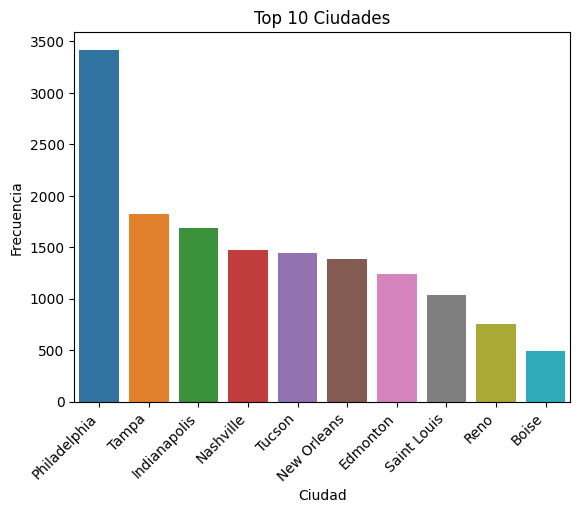

In [ ]:
city_counts = df['city'].value_counts()
df_counts = pd.DataFrame({'city': city_counts.index, 'count': city_counts.values})
df_counts = df_counts.sort_values(by='count', ascending=False)
top10_city = df_counts.head(10)

sns.barplot(x='city', y='count', data=top10_city)
plt.title('Top 10 Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Mostramos el top 5 de categorias de los negocios

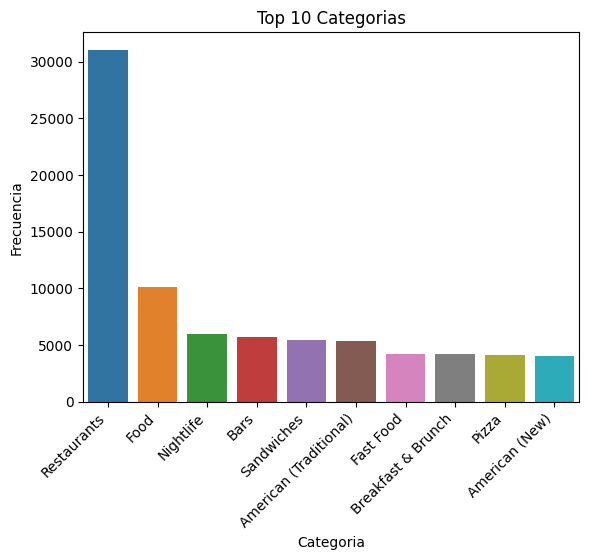

In [ ]:
df_categorias = df['categories'].str.split(', ', expand=True).stack()

# Contar la frecuencia de cada categoría
frecuencia_categorias = df_categorias.value_counts().reset_index(name='count')
top10_categorias  = frecuencia_categorias.head(10)
sns.barplot(x='index', y='count', data=top10_categorias)
plt.title('Top 10 Categorias')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


## Análisis preliminar dataset Checkin

### Se importan los datos de BigQuery

In [ ]:
# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Checkin filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_checkin = client.query(sql_query).to_dataframe()

In [ ]:
df_checkin.head()

,string_field_0,string_field_1
0,business_id,date
1,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
2,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
3,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
4,--epgcb7xHGuJ-4PUeSLAw,"2010-10-01 16:31:41, 2010-12-16 19:13:47, 2011..."


Registros de entrada y salida del negocio

## Análisis preliminar dataset Review

### Importamos los datos de BigQuery

In [ ]:
# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Review Filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_review = client.query(sql_query).to_dataframe()

In [ ]:
df_review.head()

,text,cool,stars,date,funny,review_id,useful,business_id,user_id
0,"Each location, has the BEST cappuccino and esp...",2,4.0,2011-02-24 18:52:45+00:00,0,cRD4_q-PgdRFts1z716jqQ,7,uV2UIrCxSng1tQ1Gi9n_Sw,z7THtOjTBf2hFgUU46MGlw
1,Visited on 4/3/17 around 11:15AM for lunch. $...,13,4.0,2017-04-03 23:00:10+00:00,7,3CiMIPbxAeVCzVeYn1VNZA,14,-b7A7e2zh3CDTpgChRoRKw,VigsAph76fP7pechJ743EA
2,I'm back to give this place another (well dese...,11,4.0,2017-03-03 21:04:02+00:00,5,-p2NEl85DKHKkCcn-8aQyg,11,x4K6aMaOYvGhC5jhFJP2Ag,tvQJmMBKcI3K0W2MEHavgA
3,I've passed this bowling center numerous times...,14,4.0,2010-11-08 10:34:08+00:00,11,I7uEMYVqKz6nzarM2pqzbA,12,eOYYGZaGyd5c9EIINj9T1Q,Kj-u8Yq1d3mLKitWsDAxpg
4,Worst pizza ever. Waited one hour to receive a...,0,1.0,2012-07-16 23:01:14+00:00,3,U1hQxyUlHNMrAicm5i6OYg,7,YNgX5_SYHCXSoL9IMdVboA,3eAHGkAJLUSTHYHNSOO4gw


In [ ]:
df_review['user_id'].nunique()

1098921

Hay 1,098,921 usuarios que comentaron a los negocios.

In [ ]:
df_review['business_id'].nunique()

31597

En la base de datos hay 31,597 negocios distintos.

### Nulos y tipos de datos


Validamos la cantidad de valores nulos y el tipo de dato en cada columna

In [ ]:
PorcentajeNulos(df_review)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
text,object,0.0,0,2989567,2989567
cool,Int64,0.0,0,2989567,2989567
stars,float64,0.0,0,2989567,2989567
date,"datetime64[ns, UTC]",0.0,0,2989567,2989567
funny,Int64,0.0,0,2989567,2989567
review_id,object,0.0,0,2989567,2989567
useful,Int64,0.0,0,2989567,2989567
business_id,object,0.0,0,2989567,2989567
user_id,object,0.0,0,2989567,2989567


Podemos observar que hay un total de 2,989,567 registros, y que no hay valores nulos en este dataset

### Valores duplicados

Revisamos los datos en busca de duplicados

In [ ]:
duplicados = df_review[df_review.duplicated(keep=False)]
duplicados.head()

,text,cool,stars,date,funny,review_id,useful,business_id,user_id


No hay elementos duplicados en el dataset

### Análisis de datos categóricos

Text(0.5, 1.0, 'Calificación de negocios en estrellas')

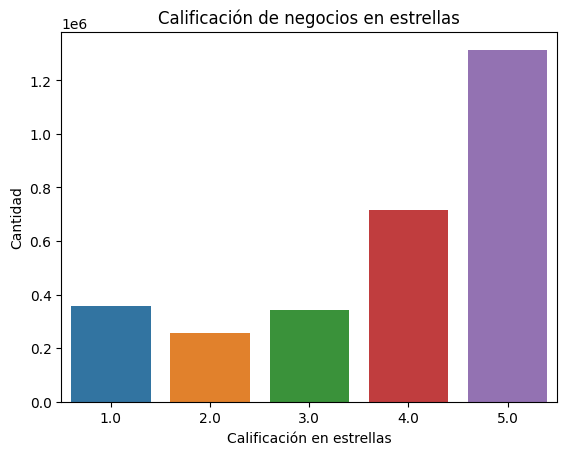

In [ ]:
sns.countplot(x = 'stars', data = df_review)
plt.xlabel('Calificación en estrellas')
plt.ylabel('Cantidad')
plt.title('Calificación de negocios en estrellas')

In [ ]:
cool = df_review['cool']
funny =
useful

## Análisis preliminar dataset Users

### Importamos los datos de BigQuery

In [ ]:
# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla

dataset_name = 'dataset_yelp'
table_name = 'Users_filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_users = client.query(sql_query).to_dataframe()

In [ ]:
df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,O5HnDFz6IzJ3ti3hG65XtA,John,7,2011-05-14 21:17:41+00:00,11,2,0,NaN,"NDV-QwY6gxwMV_KJohoCFA, jQoxeaTfOGGVEQUElR0Zbg...",1,...,0,0,0,0,0,0,0,0,0,0
1,fHS0bQ-l5rHME_xXKQSYXQ,Kevin,1401,2007-03-19 18:19:11+00:00,7875,3954,6616,2.007201e+23,"4Zi2HXp_uEjAgJHTvIsCXg, BWsutShwFQiQMoITF9IMOg...",383,...,49,31,46,75,515,1589,947,947,264,60
2,zkamNMEjihh3zN7lC7_WVw,Matthew,15,2006-02-04 15:53:46+00:00,35,4,22,NaN,"YLzb3jjc3p-XAOBRggcrgA, 9lcq01JUhRY2yW8AxU3TIA...",1,...,1,0,0,0,1,3,2,2,0,0
3,5exOQK8FRpAfw5S8s2a6gA,Jessica,216,2009-08-28 17:27:02+00:00,491,177,206,2.010201e+31,"7AQjCyuHfF5DiUH1yGj_xA, z9e5C88w9MTBhXmP8ECM6w...",34,...,9,4,12,1,55,74,74,74,8,9
4,LBV8oWri3DhnlzY7fFqUFA,Tracy,51,2011-06-27 19:44:27+00:00,148,26,20,NaN,"d5n7YWztGkm36c2LBQ8Y_w, WFXqCsd97UsXcE8K_uQ4_Q...",2,...,2,0,0,0,8,9,12,12,0,0


### Valores nulos y tipo de dato

In [ ]:
PorcentajeNulos(df_users)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
user_id,object,0.00,0,289338,289338
name,object,0.00,0,289338,289338
review_count,Int64,0.00,0,289338,289338
yelping_since,"datetime64[ns, UTC]",0.00,0,289338,289338
useful,Int64,0.00,0,289338,289338
funny,Int64,0.00,0,289338,289338
cool,Int64,0.00,0,289338,289338
elite,float64,83.62,241930,47408,289338
friends,object,0.00,0,289338,289338
fans,Int64,0.00,0,289338,289338


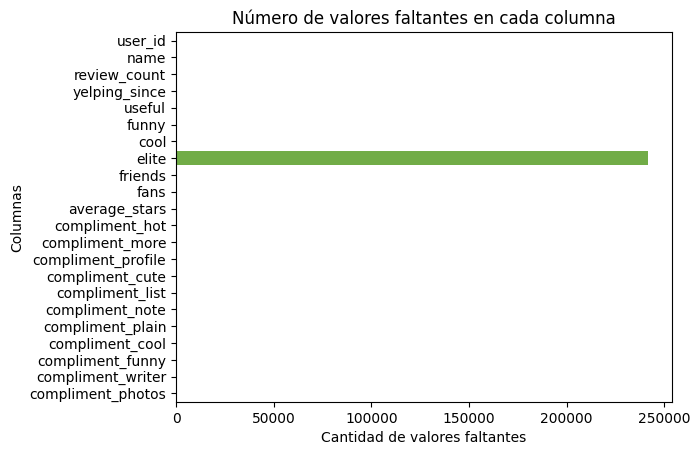

In [ ]:
nulos = df_users.isnull().sum()
sns.barplot( y = nulos.index, x = nulos.values, orient = 'h')
plt.title('Número de valores faltantes en cada columna')
plt.ylabel('Columnas')
plt.xlabel('Cantidad de valores faltantes')
plt.show()


Se observa que la columna elite tiene casi un 84% de valores nulos, esto podría ser esperado o explicado ya que el termino 'Elite' hace referencia a un programa de Yelp el cual es un reconocimiento especial otorgado a ciertos usuarios de Yelp que han demostrado un compromiso activo y contribuciones significativas a la comunidad de Yelp, por ende se sobreentiende que no todos los usuarios van a pertenecer a este grupo.

In [ ]:
df_users['user_id'].nunique()

242335

Hay 242,335 usuarios activos comentando en Yelp

### Valores duplicados

In [ ]:
duplicados = df_users[df_users.duplicated(keep=False)]
duplicados.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,O5HnDFz6IzJ3ti3hG65XtA,John,7,2011-05-14 21:17:41+00:00,11,2,0,NaN,"NDV-QwY6gxwMV_KJohoCFA, jQoxeaTfOGGVEQUElR0Zbg...",1,...,0,0,0,0,0,0,0,0,0,0
1,fHS0bQ-l5rHME_xXKQSYXQ,Kevin,1401,2007-03-19 18:19:11+00:00,7875,3954,6616,2.007201e+23,"4Zi2HXp_uEjAgJHTvIsCXg, BWsutShwFQiQMoITF9IMOg...",383,...,49,31,46,75,515,1589,947,947,264,60
2,zkamNMEjihh3zN7lC7_WVw,Matthew,15,2006-02-04 15:53:46+00:00,35,4,22,NaN,"YLzb3jjc3p-XAOBRggcrgA, 9lcq01JUhRY2yW8AxU3TIA...",1,...,1,0,0,0,1,3,2,2,0,0
3,5exOQK8FRpAfw5S8s2a6gA,Jessica,216,2009-08-28 17:27:02+00:00,491,177,206,2.010201e+31,"7AQjCyuHfF5DiUH1yGj_xA, z9e5C88w9MTBhXmP8ECM6w...",34,...,9,4,12,1,55,74,74,74,8,9
4,LBV8oWri3DhnlzY7fFqUFA,Tracy,51,2011-06-27 19:44:27+00:00,148,26,20,NaN,"d5n7YWztGkm36c2LBQ8Y_w, WFXqCsd97UsXcE8K_uQ4_Q...",2,...,2,0,0,0,8,9,12,12,0,0


Podemos observar que hay valores aparentemente duplicados, sin embargo revisando no lo son realmente por lo que no serán eliminados.

### Outliers

Buscamos en las fechas para revisar si hay outliers en los días, meses y años

In [ ]:
df_users['yelping_since'] = pd.to_datetime(df_users['yelping_since'])

# Agregar columna con el número del día
df_users['numero_dia'] = df_users['yelping_since'].dt.day

# Agregar columna con el mes
df_users['mes'] = df_users['yelping_since'].dt.month

# Agregar columna con el año
df_users['anio'] = df_users['yelping_since'].dt.year

df_users.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,numero_dia,mes,anio
0,O5HnDFz6IzJ3ti3hG65XtA,John,7,2011-05-14 21:17:41+00:00,11,2,0,NaN,"NDV-QwY6gxwMV_KJohoCFA, jQoxeaTfOGGVEQUElR0Zbg...",1,...,0,0,0,0,0,0,0,14,5,2011
1,fHS0bQ-l5rHME_xXKQSYXQ,Kevin,1401,2007-03-19 18:19:11+00:00,7875,3954,6616,2.007201e+23,"4Zi2HXp_uEjAgJHTvIsCXg, BWsutShwFQiQMoITF9IMOg...",383,...,75,515,1589,947,947,264,60,19,3,2007


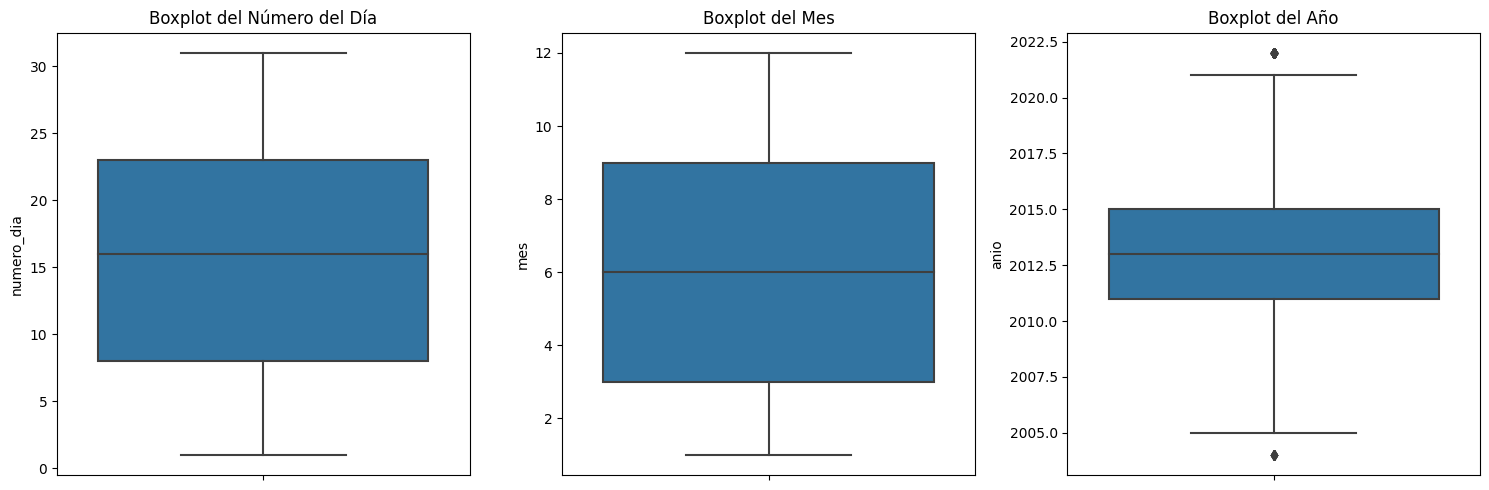

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot del número del día
sns.boxplot(y='numero_dia', data=df_users, ax=axes[0])
axes[0].set_title('Boxplot del Número del Día')

# Boxplot del mes
sns.boxplot(y='mes', data=df_users, ax=axes[1])
axes[1].set_title('Boxplot del Mes')

# Boxplot del año
sns.boxplot(y='anio', data=df_users, ax=axes[2])
axes[2].set_title('Boxplot del Año')

plt.tight_layout()
plt.show()

Se observan "outliers" en los años

In [ ]:
Q1 = df_users['anio'].quantile(0.25)
Q3 = df_users['anio'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y eliminar outliers
df_outliers = df_users[(df_users['anio'] < lower_bound) | (df_users['anio'] > upper_bound)]
df_outliers['anio'].value_counts()

2022    106
2004      9
Name: anio, dtype: int64

Observamos que son dos años los que salen: 2022 y 2004.

### Análisis de variables categóricas

Gráfico con Top 20 de usuarios que más reviews han dejado

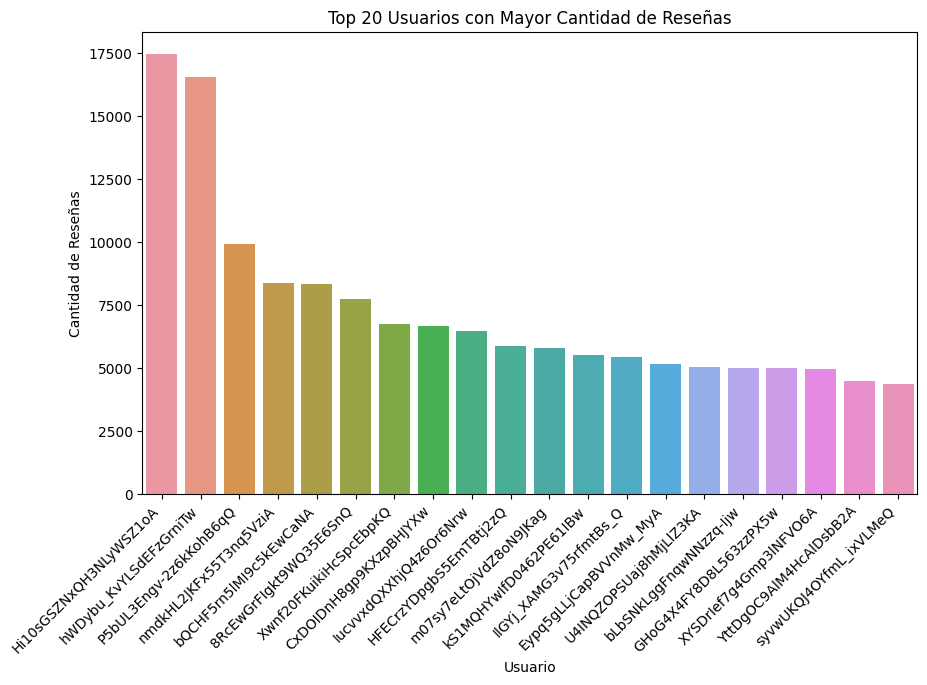

In [ ]:
df_tips_sorted = df_users.sort_values(by='review_count', ascending=False)

# Eliminar duplicados en 'user_id' para evitar contar varias veces al mismo usuario
df_tips_sorted_unique = df_tips_sorted.drop_duplicates(subset='user_id', keep='first')

top20_users = df_tips_sorted_unique.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='user_id', y='review_count', data=top20_users)
plt.title('Top 20 Usuarios con Mayor Cantidad de Reseñas')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45, ha='right')
plt.show()



Gráfico del top 20 de  usuarios con reviews más útiles

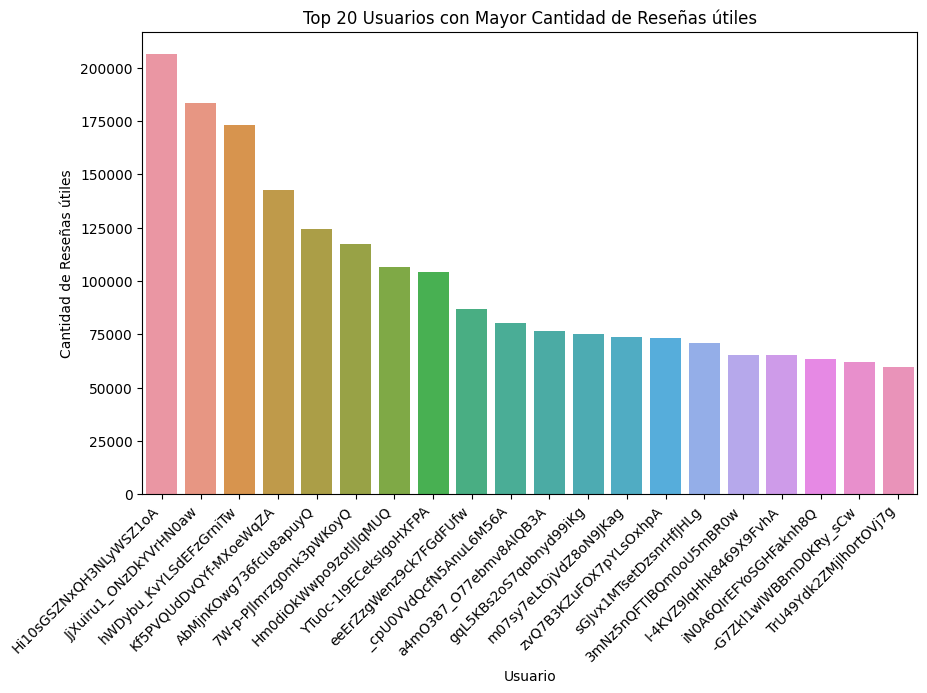

In [ ]:
df_tips_sorted = df_users.sort_values(by='useful', ascending=False)

# Eliminar duplicados en 'user_id' para evitar contar varias veces al mismo usuario
df_tips_sorted_unique = df_tips_sorted.drop_duplicates(subset='user_id', keep='first')

top20_users = df_tips_sorted_unique.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='user_id', y='useful', data=top20_users)
plt.title('Top 20 Usuarios con Mayor Cantidad de Reseñas útiles')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Reseñas útiles')
plt.xticks(rotation=45, ha='right')
plt.show()

## Análisis preliminar dataset Tips

### Importamos los datos de BigQuery

In [ ]:
# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla

dataset_name = 'dataset_yelp'
table_name = 'Users_filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_tips = client.query(sql_query).to_dataframe()

In [ ]:
df_tips.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,O5HnDFz6IzJ3ti3hG65XtA,John,7,2011-05-14 21:17:41+00:00,11,2,0,NaN,"NDV-QwY6gxwMV_KJohoCFA, jQoxeaTfOGGVEQUElR0Zbg...",1,...,0,0,0,0,0,0,0,0,0,0
1,fHS0bQ-l5rHME_xXKQSYXQ,Kevin,1401,2007-03-19 18:19:11+00:00,7875,3954,6616,2.007201e+23,"4Zi2HXp_uEjAgJHTvIsCXg, BWsutShwFQiQMoITF9IMOg...",383,...,49,31,46,75,515,1589,947,947,264,60
2,zkamNMEjihh3zN7lC7_WVw,Matthew,15,2006-02-04 15:53:46+00:00,35,4,22,NaN,"YLzb3jjc3p-XAOBRggcrgA, 9lcq01JUhRY2yW8AxU3TIA...",1,...,1,0,0,0,1,3,2,2,0,0


### Valores nulos y tipo de dato

In [ ]:
PorcentajeNulos(df_users)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
user_id,object,0.00,0,289338,289338
name,object,0.00,0,289338,289338
review_count,Int64,0.00,0,289338,289338
yelping_since,"datetime64[ns, UTC]",0.00,0,289338,289338
useful,Int64,0.00,0,289338,289338
funny,Int64,0.00,0,289338,289338
cool,Int64,0.00,0,289338,289338
elite,float64,83.62,241930,47408,289338
friends,object,0.00,0,289338,289338
fans,Int64,0.00,0,289338,289338
